In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [6]:
train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [7]:
#fill na of the columns

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode(), inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode(), inplace = True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Item identifier is a id column
train['Outlet_Identifier'].value_counts


<bound method IndexOpsMixin.value_counts of 0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object>

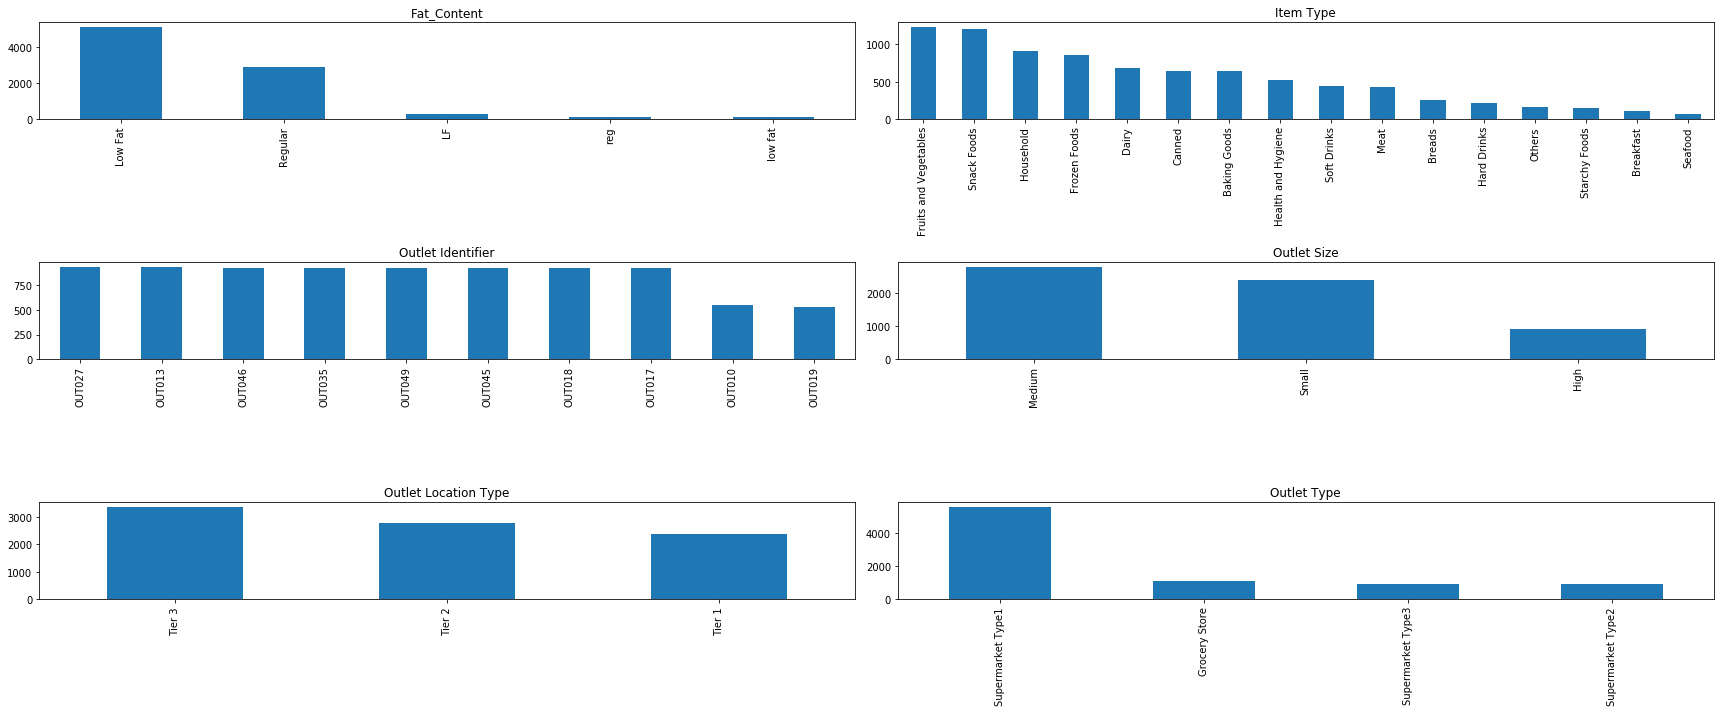

In [10]:
plt.figure(1) 

plt.subplot(321) 
train['Item_Fat_Content'].value_counts().plot.bar(figsize=(24,10), title= 'Fat_Content')

plt.subplot(322) 
train['Item_Type'].value_counts().plot.bar(title = 'Item Type')

plt.subplot(323) 
train['Outlet_Identifier'].value_counts().plot.bar(title = 'Outlet Identifier')

plt.subplot(324) 
train['Outlet_Size'].value_counts().plot.bar(title = 'Outlet Size')

plt.subplot(325) 
train['Outlet_Location_Type'].value_counts().plot.bar(title = 'Outlet Location Type')

plt.subplot(326) 
train['Outlet_Type'].value_counts().plot.bar(title = 'Outlet Type')
plt.tight_layout()
plt.show()

In [11]:
#repalce mis-spelled words
train['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
train['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
train['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)

test['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
test['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
test['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)


In [12]:
train_1 = train.drop('Item_Identifier', axis = 1)
test_1 = test.drop('Item_Identifier', axis = 1)


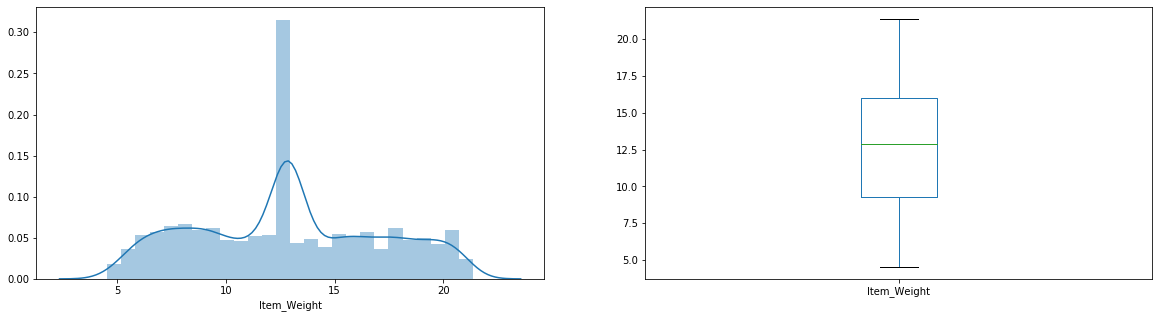

In [13]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Item_Weight'])
plt.subplot(122)
train['Item_Weight'].plot.box(figsize = (20,5))

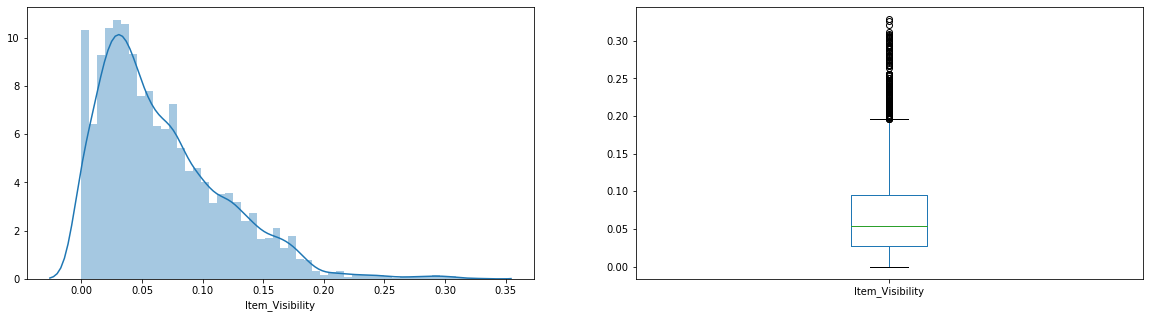

In [14]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Item_Visibility'])
plt.subplot(122)
train['Item_Visibility'].plot.box(figsize = (20,5))

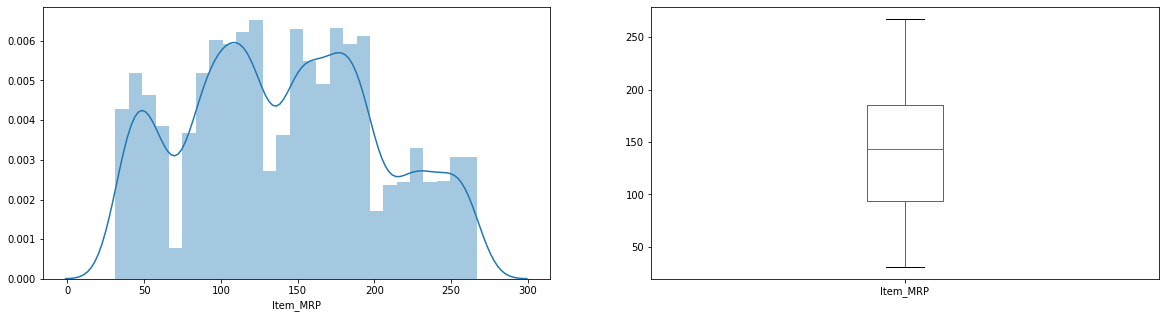

In [15]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Item_MRP'])
plt.subplot(122)
train['Item_MRP'].plot.box(figsize = (20,5))

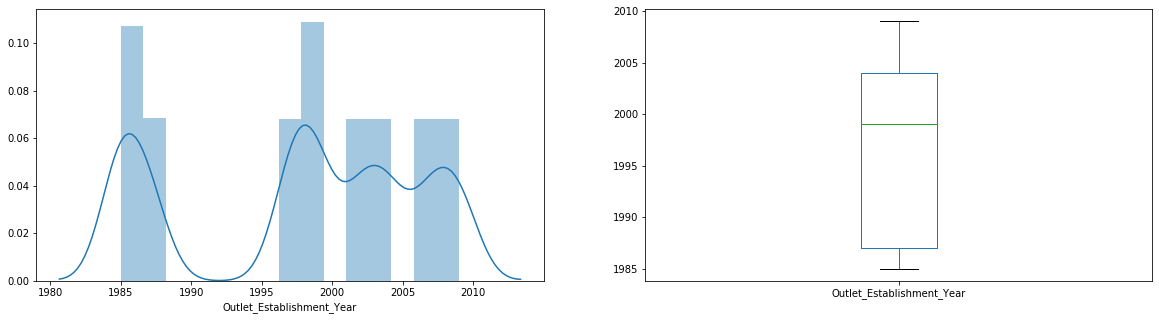

In [16]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Outlet_Establishment_Year'])
plt.subplot(122)
train['Outlet_Establishment_Year'].plot.box(figsize = (20,5))

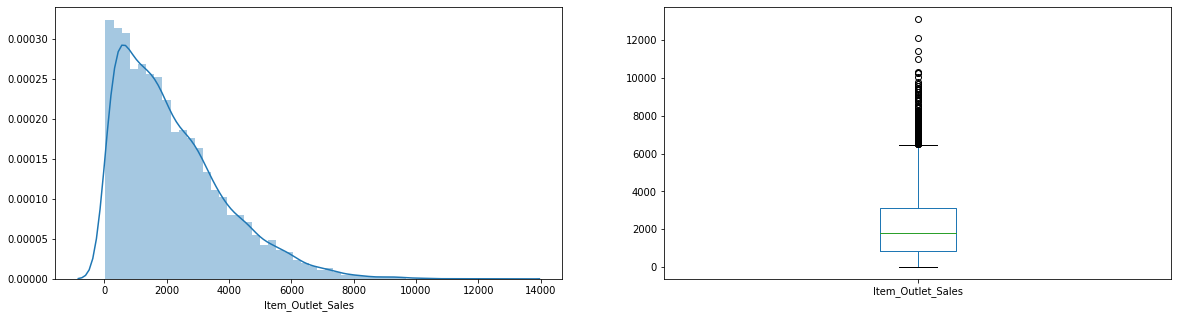

In [17]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['Item_Outlet_Sales'])
plt.subplot(122)
train['Item_Outlet_Sales'].plot.box(figsize = (20,5))

### Bivariate Analysis

### Pre Process the data

In [18]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier','Outlet_Location_Type', 'Outlet_Type']

for col in cat_cols:
    train_1[col] = LabelEncoder().fit_transform(train_1[col])

for col in cat_cols:
    test_1[col] = LabelEncoder().fit_transform(test_1[col])

In [19]:
train_1['Outlet_Size'] = LabelEncoder().fit_transform(train_1['Outlet_Size'].astype(str))
test_1['Outlet_Size'] = LabelEncoder().fit_transform(test_1['Outlet_Size'].astype(str))

In [20]:
#standard Scale

from sklearn.preprocessing import StandardScaler
import numpy as np

X_train = train_1.drop('Item_Outlet_Sales', axis = 1)
y_train = np.log(train_1['Item_Outlet_Sales'])
X_test = test_1.copy()

X_train_Scale = StandardScaler().fit_transform(X_train)
X_test_Scale = StandardScaler().fit_transform(X_test)

### Model Building

In [21]:
#linear model 1446
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_Scale, y_train)

y_pred = model_lr.predict(X_test_Scale)


submission=pd.read_csv("sample.csv")
submission['Item_Outlet_Sales']=np.exp(y_pred)
submission['Item_Identifier']=test['Item_Identifier']
submission['Outlet_Identifier']=test['Outlet_Identifier']
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('linear.csv', index = False)



In [22]:
#support vector 1175
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_Scale, y_train)

y_pred = model_svr.predict(X_test_Scale)


submission=pd.read_csv("sample.csv")
submission['Item_Outlet_Sales']=np.exp(y_pred)
submission['Item_Identifier']=test['Item_Identifier']
submission['Outlet_Identifier']=test['Outlet_Identifier']
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('svr.csv', index = False)



In [23]:
#decision tree regressor 1627
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(random_state=111)
model_dtr.fit(X_train_Scale, y_train)

y_pred = model_dtr.predict(X_test_Scale)


submission=pd.read_csv("sample.csv")
submission['Item_Outlet_Sales']=np.exp(y_pred)
submission['Item_Identifier']=test['Item_Identifier']
submission['Outlet_Identifier']=test['Outlet_Identifier']
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('dtr.csv', index = False)



In [24]:
#support vector 
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold

k_fold = KFold(n_splits = 10)

parameters = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1,0.1,0.01, 0.001, 0.0001],'kernel': ['rbf']},
              {'C':[0.1, 1, 10, 100, 1000], 'kernel' :['linear']},
              {'C':[0.1, 1, 10, 100, 1000], 'kernel' :['poly'], 'degree' : [0,1,2,3,4,5]}] 

model_svc_gs = GridSearchCV(estimator = SVR(), param_grid = parameters, cv = k_fold, refit = True)
model_svc_gs.fit(X_train,y_train)

print('The best parameter is {}'.format(model_svc_gs.best_params_))




The best parameter is {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [26]:
#SVR 1160

model_svr_1 = SVR(C = 1000, gamma = 0.0001)

model_svr_1.fit(X_train_Scale, y_train)

y_pred = model_svr_1.predict(X_test_Scale)


submission=pd.read_csv("sample.csv")
submission['Item_Outlet_Sales']=np.exp(y_pred)
submission['Item_Identifier']=test['Item_Identifier']
submission['Outlet_Identifier']=test['Outlet_Identifier']
pd.DataFrame(submission, columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']).to_csv('svr_1.csv', index = False)
